# 동작구 입지선정 프로젝트

# 데이터 / 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel('dongjak_9.xlsx')
df

,Unnamed: 0,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724


# 데이터 검토, 전처리

In [3]:
df=df.drop(columns=['Unnamed: 0'])
df

,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724


In [4]:
df=df.set_index('행정동')
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
행정동,,,,,,,,,,,,,,
노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923


# Machine learning - Clustering

## Data Scailing

In [5]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## PCA(principal Component Analysis) 

Transformed data shape: (15, 3)
Transformed data:
 [[ 4.34686331 -0.9957242  -0.21513663]
 [-0.25382278  0.92940783 -1.34953692]
 [ 6.9656495  -1.14188786 -1.03116357]
 [-1.32596304 -0.33877927  0.57935235]
 [-2.6154019   1.18552471 -0.48459441]]
Explained variance ratio: [0.62353235 0.11146688 0.10351786]


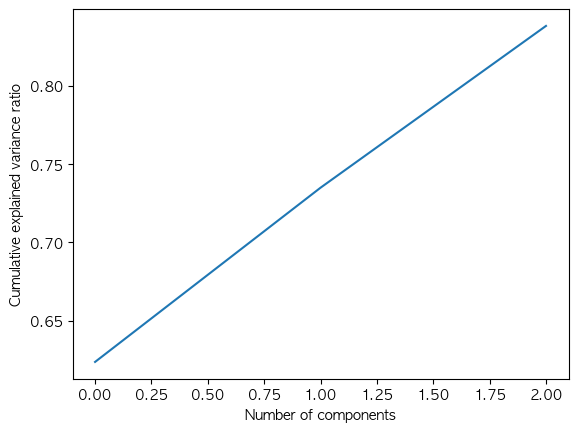

In [6]:
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


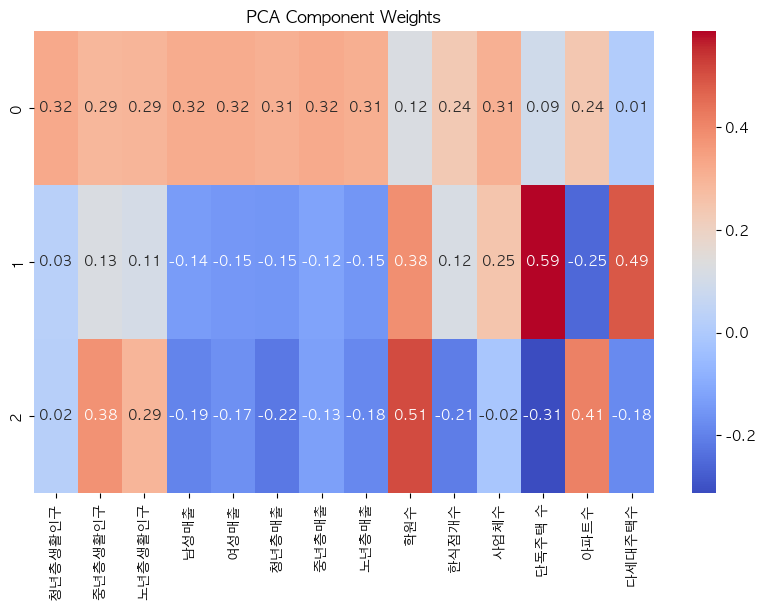

In [7]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [8]:
print(pca.components_)


[[ 0.32465023  0.2883597   0.29203963  0.31652912  0.31739631  0.30685446
   0.32078587  0.31175683  0.12373447  0.23506404  0.30594966  0.09364807
   0.24069845  0.01004401]
 [ 0.02508649  0.1259751   0.10677393 -0.13962259 -0.14971416 -0.15339757
  -0.12293446 -0.1523253   0.384672    0.11782223  0.24794996  0.58715315
  -0.25327949  0.48591321]
 [ 0.02428252  0.37914705  0.29393457 -0.19437745 -0.16558139 -0.22124867
  -0.12744364 -0.18475324  0.50865155 -0.20875897 -0.01656682 -0.31292321
   0.41428797 -0.18054726]]


In [9]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

## Elbow point & Silhouette_coefficients

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

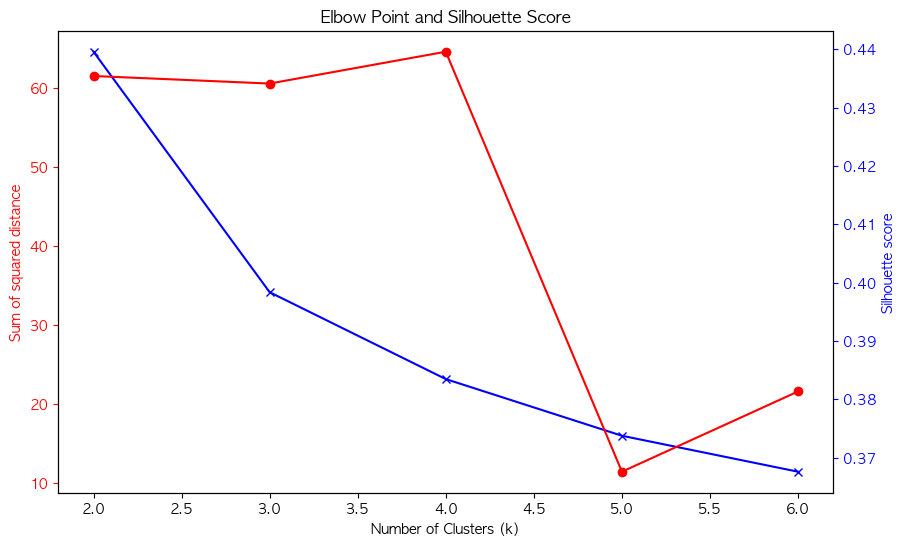

In [10]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## K-MEANS Clustering

### k=3

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


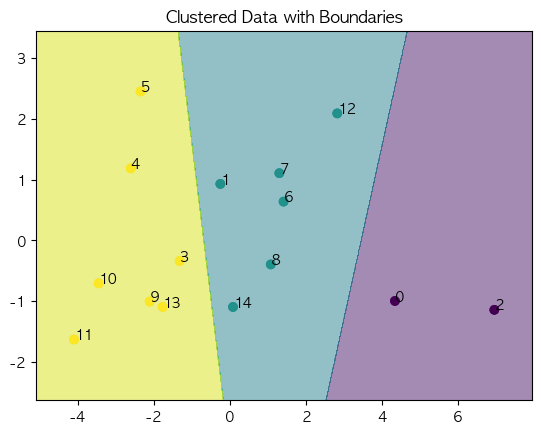

In [11]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

### k=5

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


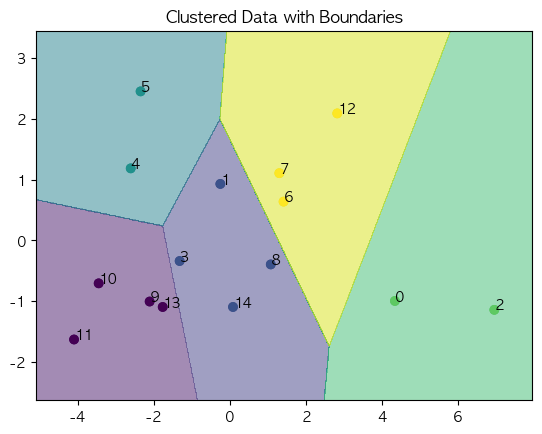

In [12]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

### k=4

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


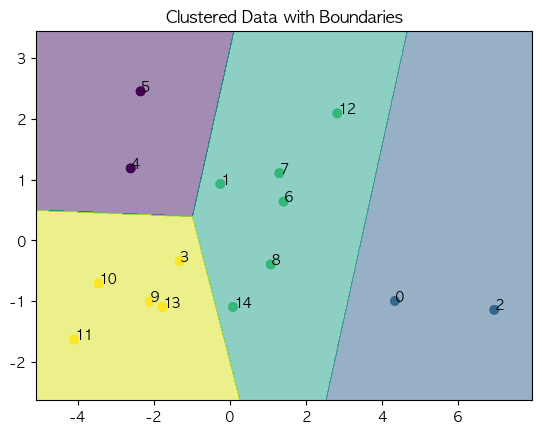

In [13]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [14]:
cluster_labels #=> k=4로 설정

array([1, 2, 1, 3, 0, 0, 2, 2, 2, 3, 3, 3, 2, 3, 2], dtype=int32)

In [15]:
#데이터프레임에 군집화 결과 저장
df['kmeans_label']=cluster_labels
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label
행정동,,,,,,,,,,,,,,,
노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836,1
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,2
상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845,1
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,3
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,2
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,2
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,2


## GMM(GaussianMixture)

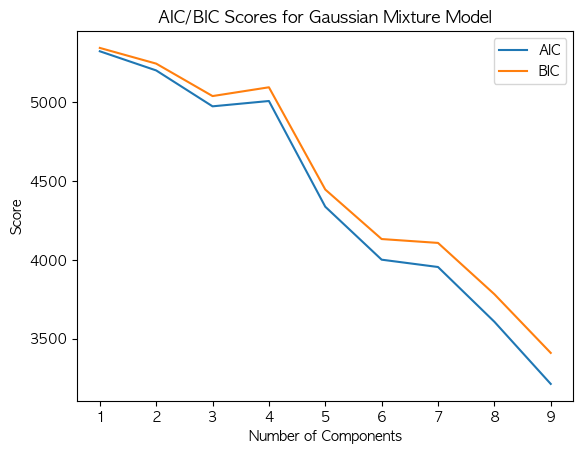

In [16]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(df)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(df)
    bic = model.bic(df)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

### 군집=4 (n_components)

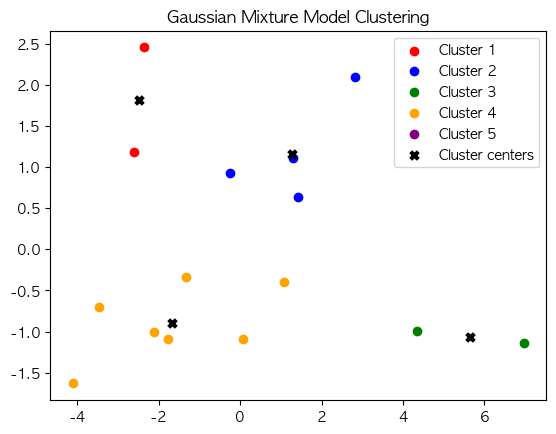

In [17]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=4, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [18]:
labels

array([2, 1, 2, 3, 0, 0, 1, 1, 3, 3, 3, 3, 1, 3, 3])

In [19]:
#gmm결과 원본데이터에 저장
df['gmm_labels']=labels
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label,gmm_labels
행정동,,,,,,,,,,,,,,,,
노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836,1,2
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,2,1
상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845,1,2
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,3,3
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0,0
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0,0
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,2,1
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,2,1
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,2,3


## PAM(Privileged Acess Management)

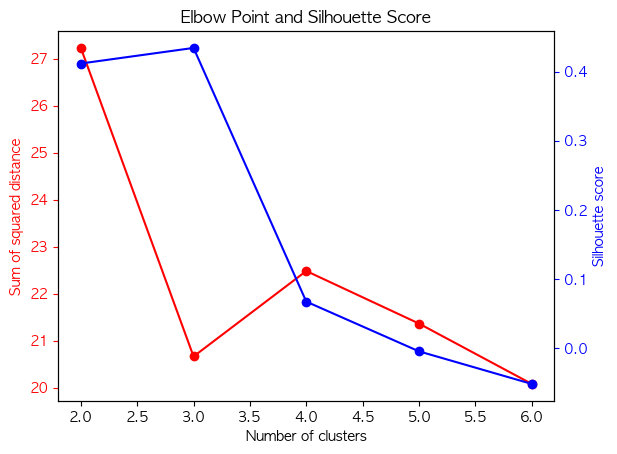

In [20]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

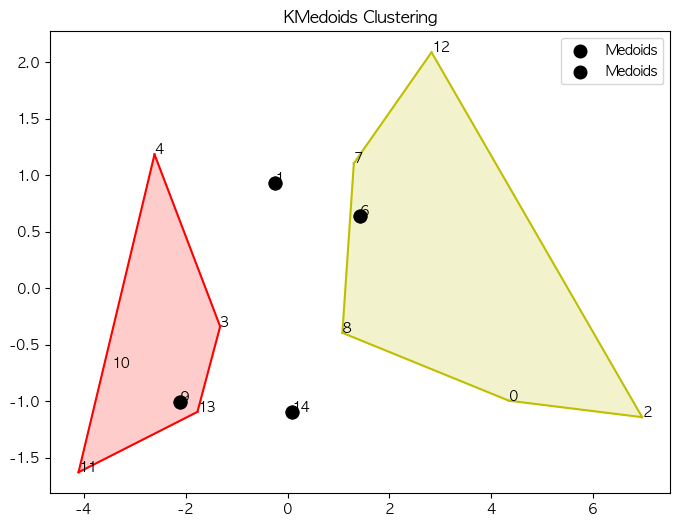

In [21]:

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


- 군집이 너무 단순한 형태로 이뤄짐
- 군집내 거리가 너무 멀고, 군집간 거리가 너무 가까움

노량진1동 : 노량진 수상시장인 인접했음 (지하철역은 노량진역(1호선, 9호선), 노들역 (9호선)위치했음)<br>
상도1동 : 중앙대학교와 숭실대학교가 인접했음 (지하철역은 상도역(7호선) 위치함)

결론 : 노량진 1동과 상도 1동은 대학가와 상권이 발달한 지하철역이 위치했으므로 이미 많은 상권이 위치했을 것이고 상권이 입점하기에는 상당한 임대료가 지출될 수 가능성이 있음. 

=> 노량진1동과 상도1동은 연구에서 배제하고 진행

# 재진행

In [54]:
df=pd.read_excel('dongjak_9.xlsx')
df

,Unnamed: 0,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724


In [23]:
df=df.drop(columns=['Unnamed: 0'])
df

,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724


**노량진1동과 상도1동 제외**

In [24]:
df=df[df['행정동']!='노량진1동'] #노량진1동은 제거
df=df[df['행정동']!='상도1동'] #노량진1동은 제거

df=df.set_index('행정동')
df


,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
행정동,,,,,,,,,,,,,,
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724
사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227


In [25]:
# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


Transformed data shape: (13, 3)
Transformed data:
 [[ 1.60418288  2.39739841 -0.14511917]
 [-0.96010041 -0.87103076 -0.39931845]
 [-2.68538798  0.182177    1.73076008]
 [-2.4197827   0.40338356  2.90829109]
 [ 3.0732488  -0.59458143 -0.30176566]]
Explained variance ratio: [0.59810066 0.14878533 0.11378898]


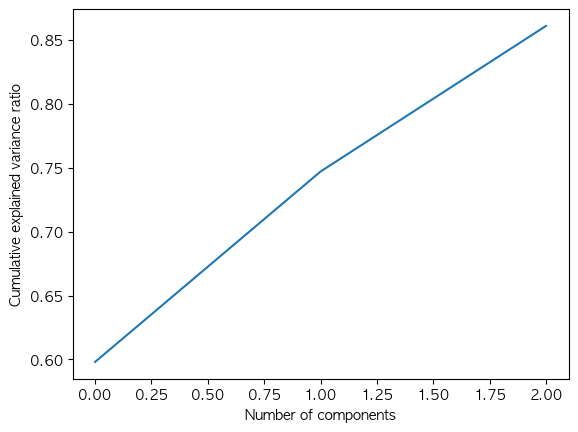

In [26]:
# PCA 수행
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# 변환된 데이터의 크기를 출력합니다.
print('Transformed data shape:', pca_result.shape)

# 변환된 데이터의 처음 5개 샘플을 출력합니다.
print('Transformed data:\n', pca_result[:5])

# 설명된 분산의 비율을 확인합니다.
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)

# 누적 설명 분산 비율을 계산합니다.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 누적 설명 분산 비율을 그래프로 나타냅니다.
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()


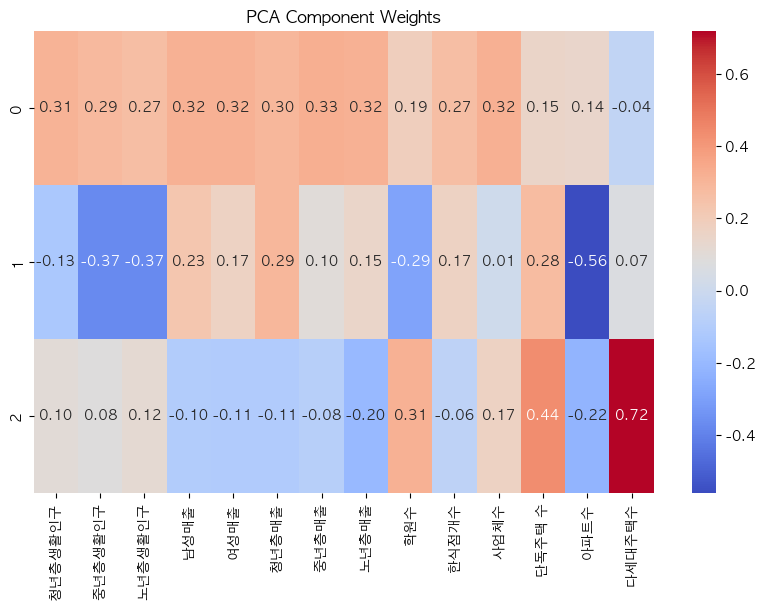

In [27]:

weights = pca.components_
n_components, n_features = weights.shape

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(weights, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=df.columns)
plt.title('PCA Component Weights')
plt.show()


In [28]:
print(pca.components_)


[[ 0.31371069  0.28502648  0.26671774  0.31553832  0.31711771  0.29742889
   0.32638033  0.31595286  0.18522679  0.2657593   0.32263283  0.15237189
   0.14162668 -0.0442785 ]
 [-0.12692569 -0.37314965 -0.3729414   0.22993423  0.1651038   0.2949046
   0.0967772   0.1483594  -0.28786145  0.16629548  0.01185224  0.27761004
  -0.56114162  0.06696059]
 [ 0.10313313  0.08147096  0.11769275 -0.10380914 -0.10663289 -0.10678073
  -0.08342228 -0.19651671  0.3146946  -0.05671018  0.16839714  0.43798803
  -0.22429983  0.71902508]]


In [29]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

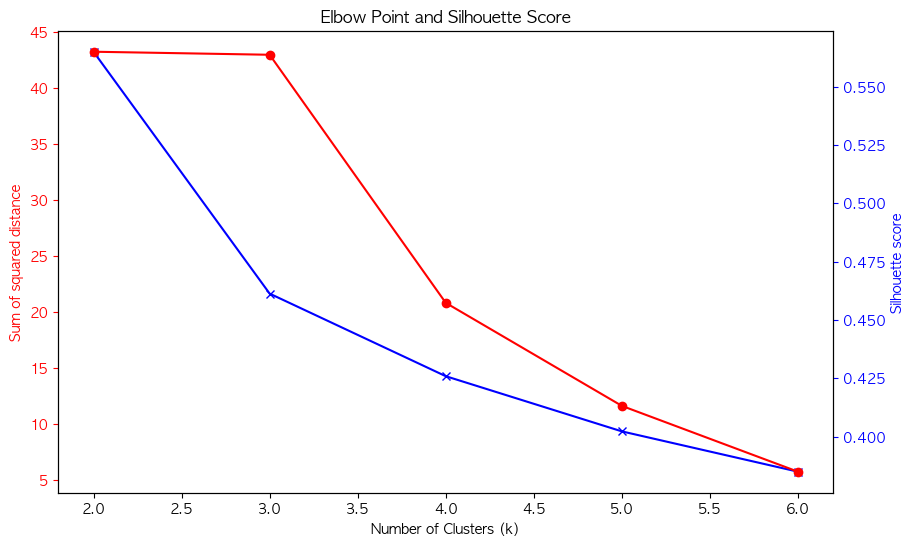

In [30]:
# 엘보우 포인트와 실루엣 계수를 저장할 리스트 초기화
sse = []
silhouette_coefficients = []

# 클러스터링을 위한 k 값 범위 설정
k_range = range(2, 7)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
    
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

# 엘보우 포인트 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_range, sse, 'bx-')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of squared distance', color='r')
ax.set_title('Elbow Point and Silhouette Score')
ax.tick_params('y', colors='r')

# 실루엣 그래프 그리기
ax2 = ax.twinx()
ax2.plot(k_range, silhouette_coefficients, 'ro-')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.show()

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


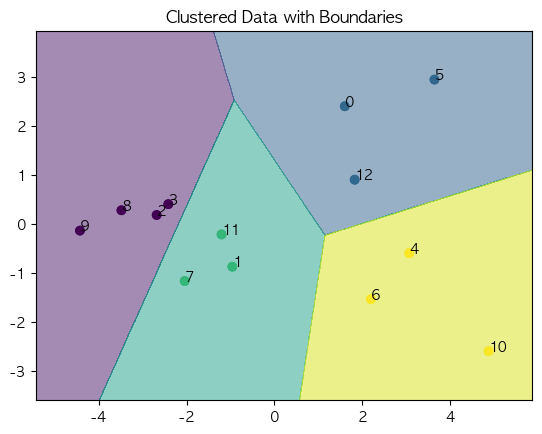

In [31]:
# Create a PCA object.
pca = PCA(n_components=2)

# Normalize data using StandardScaler before extracting principal components.
X_scaled = StandardScaler().fit_transform(df)

# Perform principal component analysis.
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, init='random', algorithm='auto')
kmeans.fit(X_pca)

# Check the cluster label for each data
cluster_labels = kmeans.labels_

# Visualize clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# Define the range for the grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Create a meshgrid of points
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the cluster labels for each point on the grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the clustered data and the cluster boundaries
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
# Display index value on scatter plot
for i, point in enumerate(X_pca):
    plt.annotate(str(i), xy=point)
    
plt.title('Clustered Data with Boundaries')
plt.show()

#군집화 = 6

In [32]:
cluster_labels #=> 군집화 3으로 설정

array([1, 2, 0, 0, 3, 1, 3, 2, 0, 0, 3, 2, 1], dtype=int32)

In [33]:
df['kmeans_label']=cluster_labels
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label
행정동,,,,,,,,,,,,,,,
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,1
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,2
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,3
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,1
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,3
사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724,2
사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0


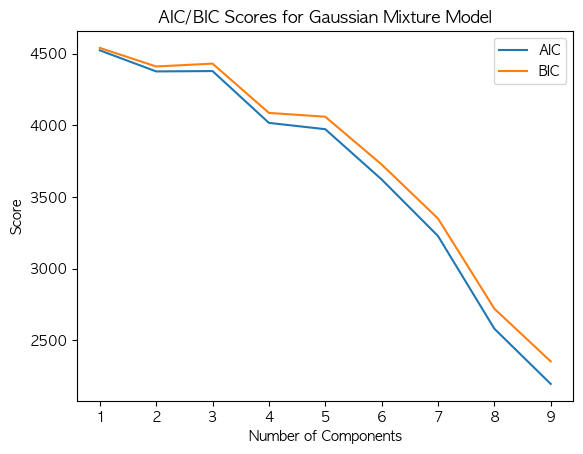

In [34]:
from sklearn.mixture import GaussianMixture

n_components_range = range(1, 10)
aic_values = []
bic_values = []
for n_components in n_components_range:
    #model = GaussianMixture(n_components=n_components, random_state=0)
    model = GaussianMixture(n_components=n_components, covariance_type='diag', random_state=0)
#covariance_type을 변경하니 해결됨 ->diag 
    model.fit(df)  # X는 클러스터링할 데이터입니다.
    aic = model.aic(df)
    bic = model.bic(df)
    aic_values.append(aic)
    bic_values.append(bic)

#AIC와 BIC 값을 플롯에 표시합니다.
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')

# 플롯의 스타일과 레이블 등을 설정합니다.
plt.title('AIC/BIC Scores for Gaussian Mixture Model')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()

# 그래프를 보여줍니다.
plt.show()

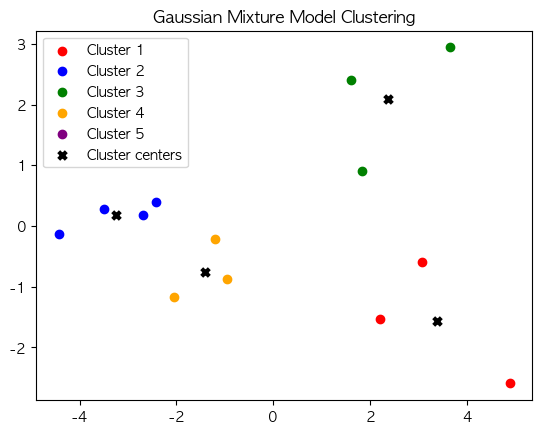

In [35]:
# gmm 모델 인스턴스화
gmm = GaussianMixture(n_components=4, random_state=42)

# 모델 학습
gmm.fit(X_pca)

# 클러스터 예측
centers = gmm.means_

labels = gmm.predict(X_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()

for i in range(5):
    ax.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
ax.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=30, linewidth=3, label="Cluster centers")

# Chart settings
ax.set_title('Gaussian Mixture Model Clustering')
ax.legend()
plt.show()
# 1 11 2

In [36]:
df['gmm_labels']=labels
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label,gmm_labels
행정동,,,,,,,,,,,,,,,,
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,1,2
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,2,3
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0,1
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0,1
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,3,0
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,1,2
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,3,0
사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724,2,3
사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0,1


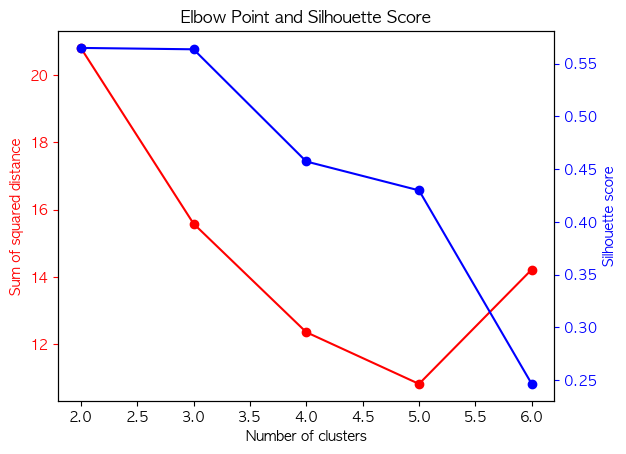

In [37]:
# k-medoids 알고리즘 적용
elbow_scores = []
silhouette_scores = []
for n_clusters in range(2, 7):
    kmedoids = KMedoids(n_clusters=n_clusters).fit(X_pca)
    elbow_scores.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmedoids.labels_))

# 엘보우 포인트와 실루엣 값을 그래프에 시각화
fig, ax1 = plt.subplots()

# 엘보우 포인트 그래프
ax1.plot(range(2, 7), elbow_scores, 'o-', color='r')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Sum of squared distance', color='r')
ax1.tick_params('y', colors='r')

# 실루엣 값 그래프
ax2 = ax1.twinx()
ax2.plot(range(2, 7), silhouette_scores, 'o-', color='b')
ax2.set_ylabel('Silhouette score', color='b')
ax2.tick_params('y', colors='b')

plt.title('Elbow Point and Silhouette Score')
plt.show()

군집 수 5로 설정

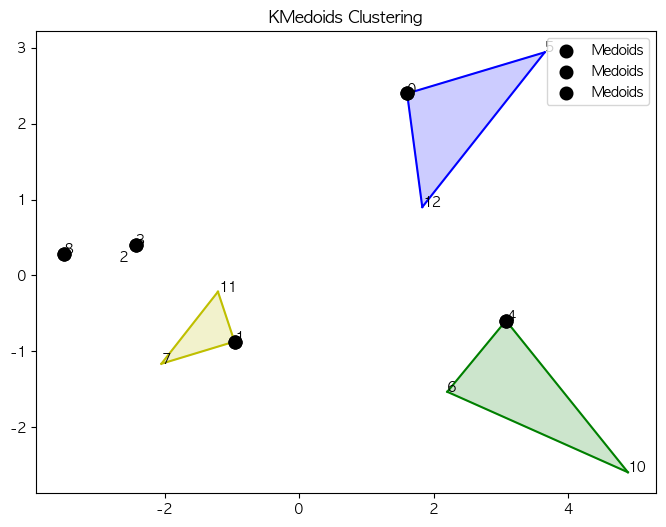

In [38]:

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


In [39]:
df['y_kmedoids']=y_kmedoids
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label,gmm_labels,y_kmedoids
행정동,,,,,,,,,,,,,,,,,
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,1,2,2
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,2,3,3
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0,1,0
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0,1,0
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,3,0,1
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,1,2,2
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,3,0,1
사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724,2,3,3
사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0,1,4


군집 수 4로 설정

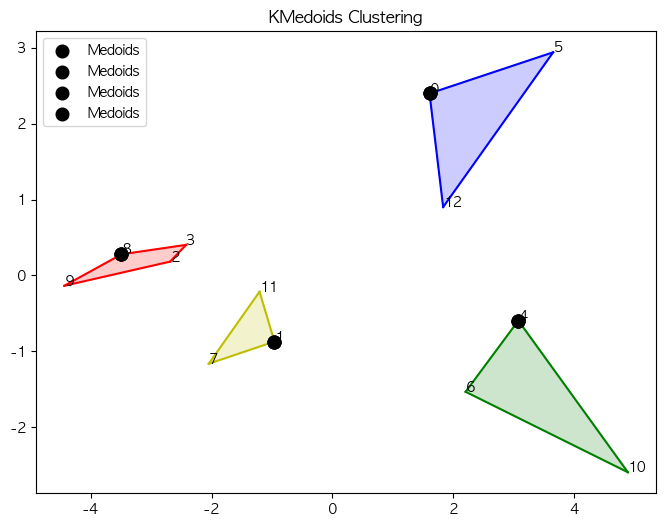

In [40]:

# Create and train KMedoids models
kmedoids = KMedoids(n_clusters=4, random_state=0)
y_kmedoids = kmedoids.fit_predict(X_pca)

# Define cluster colors
colors = ['r', 'g', 'b', 'y']

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each cluster with different color and label
for i in range(4):
    cluster_points = X_pca[y_kmedoids == i]
    
    if len(cluster_points) >= 3:
        # Get indices of outermost points in the cluster
        hull = ConvexHull(cluster_points)
        outermost_points_idx = hull.vertices
        
        # Plot lines connecting outermost points and fill interior space
        n_points = len(outermost_points_idx)
        for j in range(n_points):
            ax.plot([cluster_points[outermost_points_idx[j], 0], cluster_points[outermost_points_idx[(j+1)%n_points], 0]],
                    [cluster_points[outermost_points_idx[j], 1], cluster_points[outermost_points_idx[(j+1)%n_points], 1]], color=colors[i])
        ax.fill(cluster_points[outermost_points_idx, 0], cluster_points[outermost_points_idx, 1], color=colors[i], alpha=0.2)
        
        # Plot Medoids as black markers
        medoids = kmedoids.cluster_centers_
        ax.scatter(medoids[:, 0], medoids[:, 1], marker='o', s=50,
                   linewidths=3, color='black', zorder=10, label='Medoids')

# Add point indices to the plot
for i, point in enumerate(X_pca):
    ax.annotate(str(i), xy=point)

# Set plot title and legend
ax.set_title('KMedoids Clustering')
ax.legend()

# Show the plot
plt.show()


# 모델 선정 / 군집 개수 설정

**모델은 PAM기법을 사용 / 군집 개수는 4로 설정**

상도1동과 노량진1동을 제외하기 전보다 군집 간 거리는 더 멀어졌고, 군집 내 거리는 가까워진 을 확인할 수 있음 

In [41]:
df['y_kmedoids']=y_kmedoids
df

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label,gmm_labels,y_kmedoids
행정동,,,,,,,,,,,,,,,,,
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,1,2,2
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,2,3,3
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0,1,0
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0,1,0
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,3,0,1
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,1,2,2
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,3,0,1
사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724,2,3,3
사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0,1,0


In [42]:
df=df.reset_index()
df

,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,kmeans_label,gmm_labels,y_kmedoids
0,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,1,2,2
1,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817,2,3,3
2,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0,1,0
3,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0,1,0
4,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,3,0,1
5,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,1,2,2
6,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,3,0,1
7,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724,2,3,3
8,사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0,1,0
9,사당5동,416.485585,408.513714,409.066296,306502152,191184635,241397666,169616354,77646198,36,21,910,457,1720,1101,0,1,0


In [43]:
clustering_result=df[['행정동','kmeans_label','gmm_labels','y_kmedoids']]
clustering_result

,행정동,kmeans_label,gmm_labels,y_kmedoids
0,노량진2동,1,2,2
1,상도2동,2,3,3
2,상도3동,0,1,0
3,상도4동,0,1,0
4,흑석동,3,0,1
5,사당1동,1,2,2
6,사당2동,3,0,1
7,사당3동,2,3,3
8,사당4동,0,1,0
9,사당5동,0,1,0


In [44]:
pam=clustering_result.sort_values(by='y_kmedoids',ascending=True)
pam

,행정동,kmeans_label,gmm_labels,y_kmedoids
2,상도3동,0,1,0
3,상도4동,0,1,0
8,사당4동,0,1,0
9,사당5동,0,1,0
4,흑석동,3,0,1
6,사당2동,3,0,1
10,대방동,3,0,1
0,노량진2동,1,2,2
5,사당1동,1,2,2
12,신대방2동,1,2,2


0번군집( = 상도3동, 상도4동, 사당4동, 사당5동

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

# 결과해석

In [45]:
result=df.drop(columns=['kmeans_label','gmm_labels'])

In [46]:
result=result.sort_values(by='y_kmedoids', ascending=True)
result

,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,y_kmedoids
2,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0
3,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0
8,사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0
9,사당5동,416.485585,408.513714,409.066296,306502152,191184635,241397666,169616354,77646198,36,21,910,457,1720,1101,0
4,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,1
6,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,1
10,대방동,1600.424545,1559.291350,1312.057926,2215809937,1294273186,1689380125,1481755623,245583290,131,72,2475,1002,7032,3281,1
0,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,2
5,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,2
12,신대방2동,956.484514,907.968876,793.250846,2277690209,1227319122,1802666512,1406649960,258210591,35,86,1810,690,3092,1447,2


## describe함수를 통한 통계치 확인

In [47]:
clustering0=result[result['y_kmedoids']==0]
print(clustering0.describe())

print('\n')
print('\n')
clustering1=result[result['y_kmedoids']==1]
print(clustering1.describe())

print('\n')
print('\n')
clustering1=result[result['y_kmedoids']==2]
print(clustering1.describe())

          청년층생활인구     중년층생활인구     노년층생활인구          남성매출          여성매출  \
count    4.000000    4.000000    4.000000  4.000000e+00  4.000000e+00   
mean   585.191099  544.696429  587.300609  4.776678e+08  2.472172e+08   
std    126.982301  118.823875  144.334520  1.412368e+08  5.042263e+07   
min    416.485585  408.513714  409.066296  3.065022e+08  1.911846e+08   
25%    524.330347  472.318001  504.205936  4.183058e+08  2.222686e+08   
50%    612.867683  544.575278  604.316309  4.772145e+08  2.426566e+08   
75%    673.728435  616.953706  687.410983  5.365765e+08  2.676052e+08   
max    698.543446  681.121447  731.503520  6.497399e+08  3.123710e+08   

              청년층매출         중년층매출         노년층매출        학원수      한식점개수  \
count  4.000000e+00  4.000000e+00  4.000000e+00   4.000000   4.000000   
mean   3.619784e+08  2.840550e+08  7.028262e+07  38.000000  42.750000   
std    1.161568e+08  8.025368e+07  9.773806e+06   2.309401  20.402206   
min    2.413977e+08  1.696164e+08  5.622873e+07  3

In [48]:
result

,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수,y_kmedoids
2,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436,0
3,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407,0
8,사당4동,560.278601,493.586097,535.919149,649739874,312370953,517927432,357346437,76124518,36,30,963,704,975,2227,0
9,사당5동,416.485585,408.513714,409.066296,306502152,191184635,241397666,169616354,77646198,36,21,910,457,1720,1101,0
4,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836,1
6,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923,1
10,대방동,1600.424545,1559.291350,1312.057926,2215809937,1294273186,1689380125,1481755623,245583290,131,72,2475,1002,7032,3281,1
0,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811,2
5,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442,2
12,신대방2동,956.484514,907.968876,793.250846,2277690209,1227319122,1802666512,1406649960,258210591,35,86,1810,690,3092,1447,2


## 모든 피처에 대한 시각화

### 생활인구

<Axes: xlabel='행정동', ylabel='노년층생활인구'>

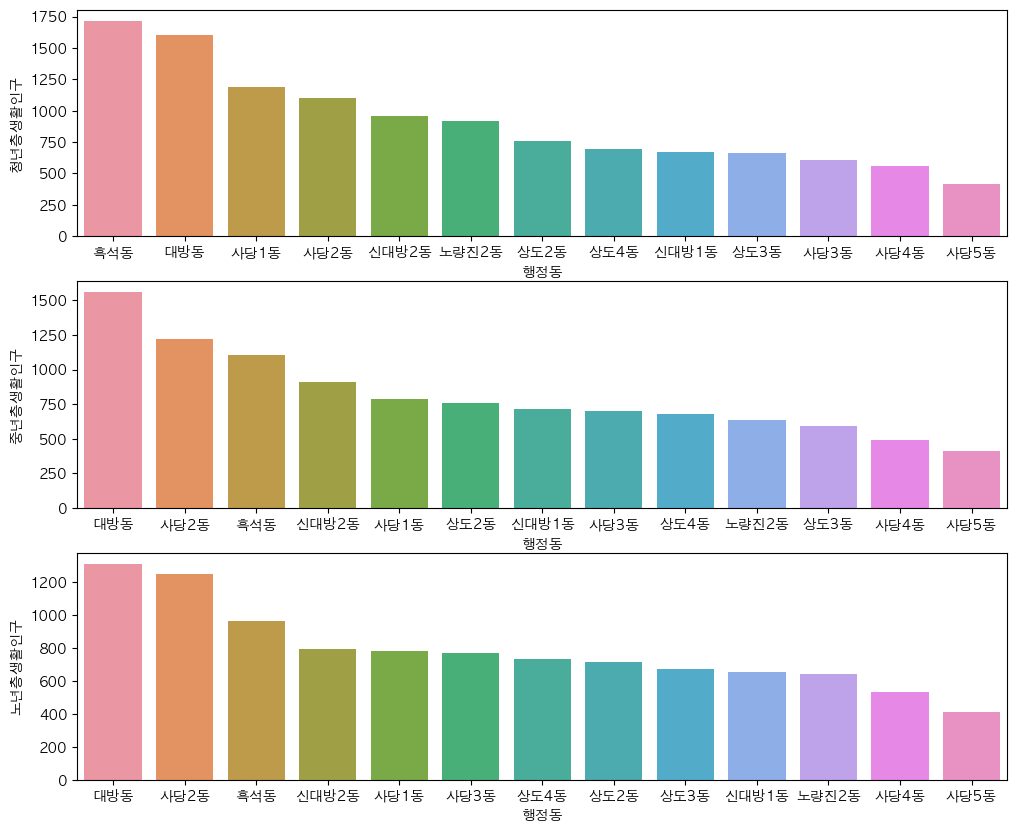

In [49]:
#생활인구 시각화

청년인구=result.sort_values(by='청년층생활인구', ascending=False)
중년인구=result.sort_values(by='중년층생활인구', ascending=False)
노년인구=result.sort_values(by='노년층생활인구', ascending=False)

fig, ax=plt.subplots(nrows=3, figsize=(12,10))
sns.barplot(data=청년인구, x='행정동', y='청년층생활인구', ax=ax[0])
sns.barplot(data=중년인구, x='행정동', y='중년층생활인구', ax=ax[1])
sns.barplot(data=노년인구, x='행정동', y='노년층생활인구', ax=ax[2])

0번군집 = 상도3동, 상도4동, 사당4동, 사당5동

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

**청년층**

0번군집 : 청년층생활인구가 낮은 특성<br>
1번군집 : 청년층생활인구가 높은 특성<br>
2번군집 : 청년층생활인구가 약간 높은 특성<br>
3번군집 : 청년층생활인구가 약간 낮은 특성<br>

**중년층**

0번군집 : 중년층생활인구가 낮은 특성<br>
1번군집 : 중년층생활인구가 높은 특성<br>
2번군집 : 중년층생활인구가 약간 높은 특성(노량진 2동은 약간 낮은 값)<br>
3번군집 : 중년층생활인구가 보통인 특성<br>

**노년층**

0번군집 : 노년층생활인구가 보통 혹은 낮은 특성<br>
1번군집 : 노년층생활인구가 높은 특성<br>
2번군집 : 노년층생활인구가 높거나 낮은(노량진2동) 특성<br>
3번군집 : 노년층생활인구가 보통인 특성<br>




### 매출별(성별)

<Axes: xlabel='행정동', ylabel='여성매출'>

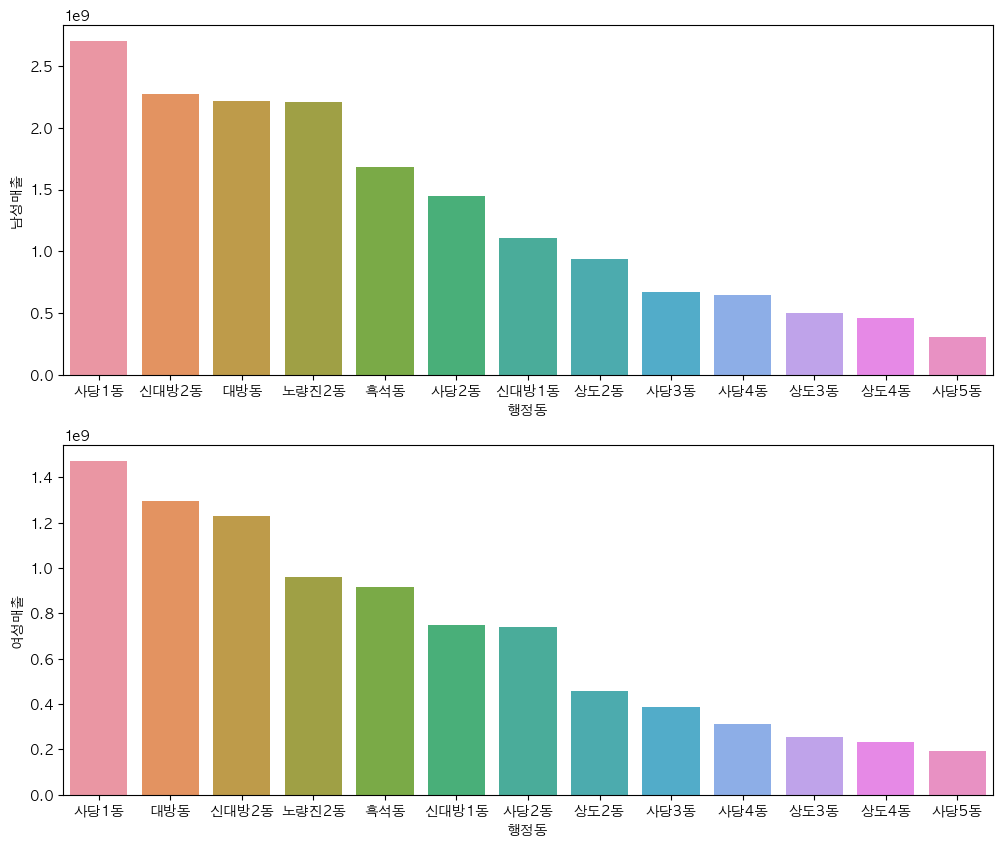

In [50]:
#매출별(성별)) 시각화

남성매출=result.sort_values(by='남성매출', ascending=False)
여성매출=result.sort_values(by='여성매출', ascending=False)

fig, ax=plt.subplots(nrows=2, figsize=(12,10))
sns.barplot(data=남성매출, x='행정동', y='남성매출', ax=ax[0])
sns.barplot(data=여성매출, x='행정동', y='여성매출', ax=ax[1])

0번군집 = 상도3동, 상도4동, 사당4동, 사당5동

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

**남성매출**

0번군집 : 남성매출이 낮은 특성<br>
1번군집 : 남성매출이 약간 높은 특성<br>
2번군집 : 남성매출이 높은 특성<br>
3번군집 : 남성매출이 약간 낮은 특성<br>

**여성매출**

0번군집 : 여성매출이 낮은 특성<br>
1번군집 : 여성매출이 보통 혹은 높은(대방동) 특성<br>
2번군집 : 여성매출이 높은 특성<br>
3번군집 : 여성매출이 보통이거나 약간 낮은 특성<br>

### 매출별(연령별)

<Axes: xlabel='행정동', ylabel='노년층매출'>

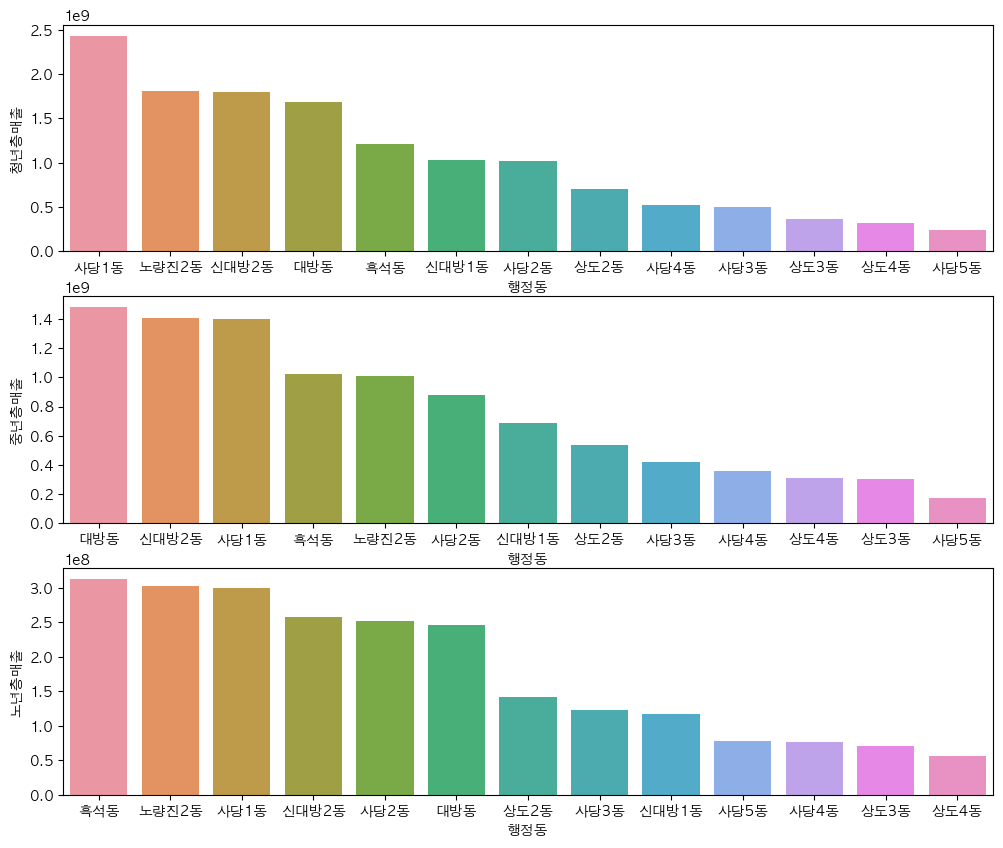

In [51]:
#매출별(연령별)) 시각화

청년층매출=result.sort_values(by='청년층매출', ascending=False)
중년층매출=result.sort_values(by='중년층매출', ascending=False)
노년층매출=result.sort_values(by='노년층매출', ascending=False)

fig, ax=plt.subplots(nrows=3, figsize=(12,10))
sns.barplot(data=청년층매출, x='행정동', y='청년층매출', ax=ax[0])
sns.barplot(data=중년층매출, x='행정동', y='중년층매출', ax=ax[1])
sns.barplot(data=노년층매출, x='행정동', y='노년층매출', ax=ax[2])

0번군집 = 상도3동, 상도4동, 사당4동, 사당5동

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

**청년층매출**

0번군집 : 청년층 매출이 낮은 특성<br>
1번군집 : 청년층 매출이 약간 높은 특성<br>
2번군집 : 청년층 매출이 높은 특성<br>
3번군집 : 청년층 매출이 보통 혹은 약간 낮은 특성<br>

**중년층매출**

0번군집 : 중년층 매출이 낮은 특성<br>
1번군집 : 중년층 매출이 약간 높거나 매우 높은(대방동)특성<br>
2번군집 : 중년층 매출이 약간 높은 특성<br>
3번군집 : 중년층 매출이 보통이거나 약간 낮은 특성<br>

**노년층매출**

0번군집 : 노년층 매출이 낮은 특성<br>
1번군집 : 노년층 매출이 매우 높거나(흑석동) 보통인 특성<br>
2번군집 : 노년층 매출이 높은 특성<br>
3번군집 : 노년층 매출이 보통이거나 약간 낮은 특성<br>

### 학원수/한식점개수/사업체수

<Axes: xlabel='행정동', ylabel='사업체수'>

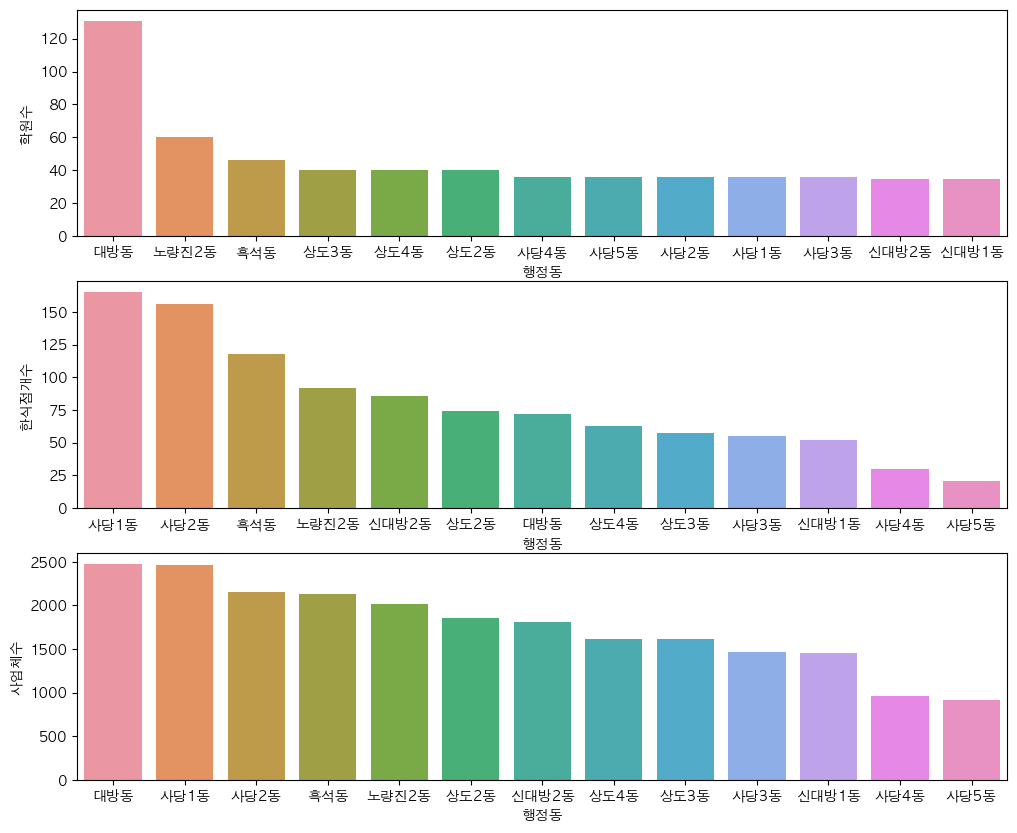

In [52]:

학원수=result.sort_values(by='학원수', ascending=False)
한식점개수=result.sort_values(by='한식점개수', ascending=False)
사업체수=result.sort_values(by='사업체수', ascending=False)

fig, ax=plt.subplots(nrows=3, figsize=(12,10))
sns.barplot(data=학원수, x='행정동', y='학원수', ax=ax[0])
sns.barplot(data=한식점개수, x='행정동', y='한식점개수', ax=ax[1])
sns.barplot(data=사업체수, x='행정동', y='사업체수', ax=ax[2])

0번군집 = 상도3동, 상도4동, 사당4동, 사당5동

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

**학원수**

0번군집 : <br>
1번군집 : 학원수 많은 편<br>
2번군집 : 학원수 약간 많음<br>
3번군집 : <br>

**한식점개수**

0번군집 : 한식점 수가 적은편<br>
1번군집 : 한식점 수가 많은편이거나 보통인편 <br>
2번군집 : 한식점 수가 약간 높거나 매우 많은 편(사당1동)<br>
3번군집 : 한식점 수가 보통이거나 약간 적은편 <br>

**사업체수**

0번군집 : 사업체수가 적은편<br>
1번군집 : 사업체수가 많은편<br>
2번군집 : 사업체수가 보통이거나 약간 많은 편<br>
3번군집 : 사업체수가 보통이거나 적은 편 <br>

### 주거정보(단독주택, 아파트, 다세대주택)

<Axes: xlabel='행정동', ylabel='다세대주택수'>

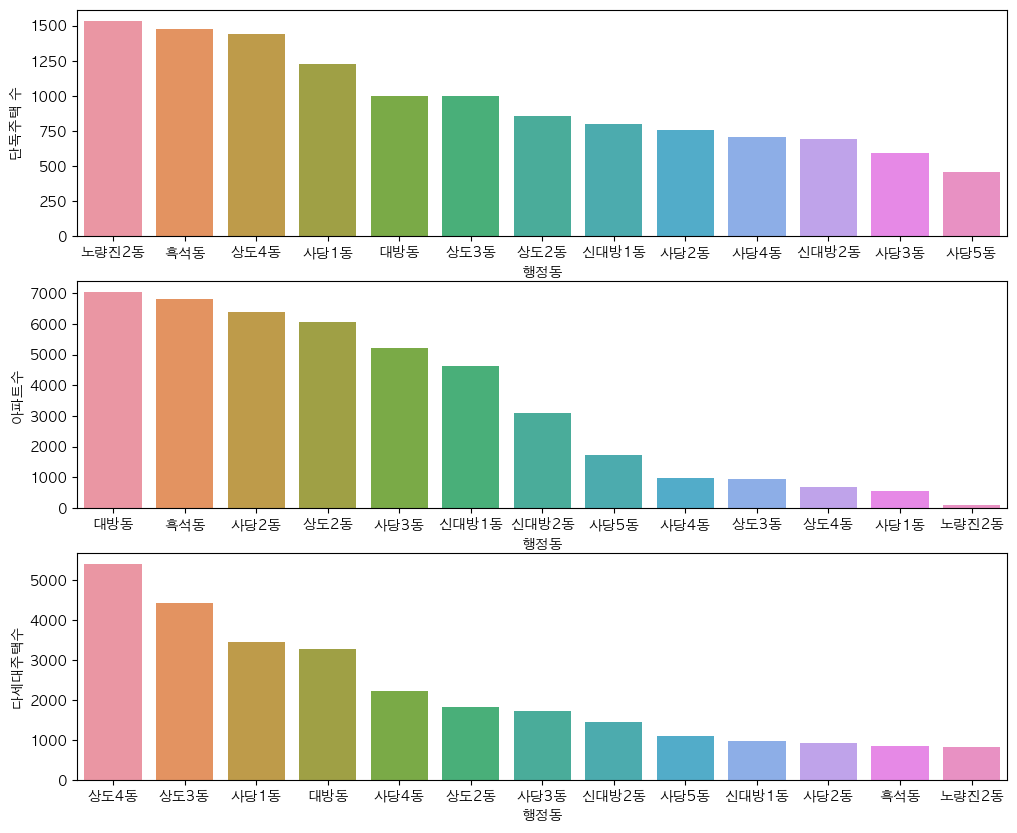

In [53]:

단독주택=result.sort_values(by='단독주택 수', ascending=False)
아파트=result.sort_values(by='아파트수', ascending=False)
다세대주택=result.sort_values(by='다세대주택수', ascending=False)


fig, ax=plt.subplots(nrows=3, figsize=(12,10))
sns.barplot(data=단독주택, x='행정동', y='단독주택 수', ax=ax[0])
sns.barplot(data=아파트, x='행정동', y='아파트수', ax=ax[1])
sns.barplot(data=다세대주택, x='행정동', y='다세대주택수', ax=ax[2])

0번군집 = 상도3동, 상도4동, 사당4동, 사당5동 

1번군집 = 흑석동, 사당2동, 대방동

2번군집 = 노량진2동, 사당1동, 신대방2동

3번군집 = 상도2동, 사당3동, 신대방1동 

**단독주택개수**

0번군집 : 분산이 큼<br>
1번군집 : 분산이 큼<br>
2번군집 : 분산이 큼<br>
3번군집 : 단독주택수가 적거나 보통인편<br>

**아파트개수**
0번군집 : 아파트 수가 약간 적은편<br>
1번군집 : 아파트 수가 아파트 수가 많은편<br>
2번군집 : 아파트 수가 낮거나 보통인편(신대방2동)<br>
3번군집 : 아파트 수가 약간 많은편<br>

**다세대주택수**
0번군집 : 다세대주택수가 많거나 보통인편<br>
1번군집 : 다세대주택수가 아주 적거나 약간 많은 편(대방동)<br>
2번군집 : 분산이큼<br>
3번군집 : 다세대주택수가 보통인편<br>

# 정리

**생활인구**<br>
청년, 중년, 노년층 값에서 특정한 차이를 보이는 곳은 없음 

1번 > 2번 > 3번 > 0번 군집 순서

**매출**<br>
남성, 여성별로 차이를 보이는 곳은 없음<br>

청년층 = 2번군집 / 중년층 = 1, 2번 군집 / 노년층 = 2번군집이 높은 값임 

**학원수** <br>
1번군집 > 2번군집 

**한식점** <br>
1 > 2번 군집 

**사업체수** <br>
1 > 2번 군집 

**주거** <br>
아파트개수 : 1번군집 > 3번군집 <br>
다세대주택(빌라촌) : 0번군집 >>> 

=> 

0번군집 특성 : 다세대주택(빌라촌) 많음, 생활인구는 적음, 매출 적음, 학원수가 많지 않음, 한식점 수 적음, 사업체 수 적음

1번군집 특성 : 생활인구 많음, 매출 약간 많음, 학원수와 사업체수(회사)가 많음, 아파트가 많음 

2번군집 특성 : 생활인구가 약간 맣음, 매출 좋음, 학원수와 사업체수가 약간 많음

3번군집 특성 : 두드러지는 특성 없이 모든 값이 평균과 가까운 특성


In [55]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


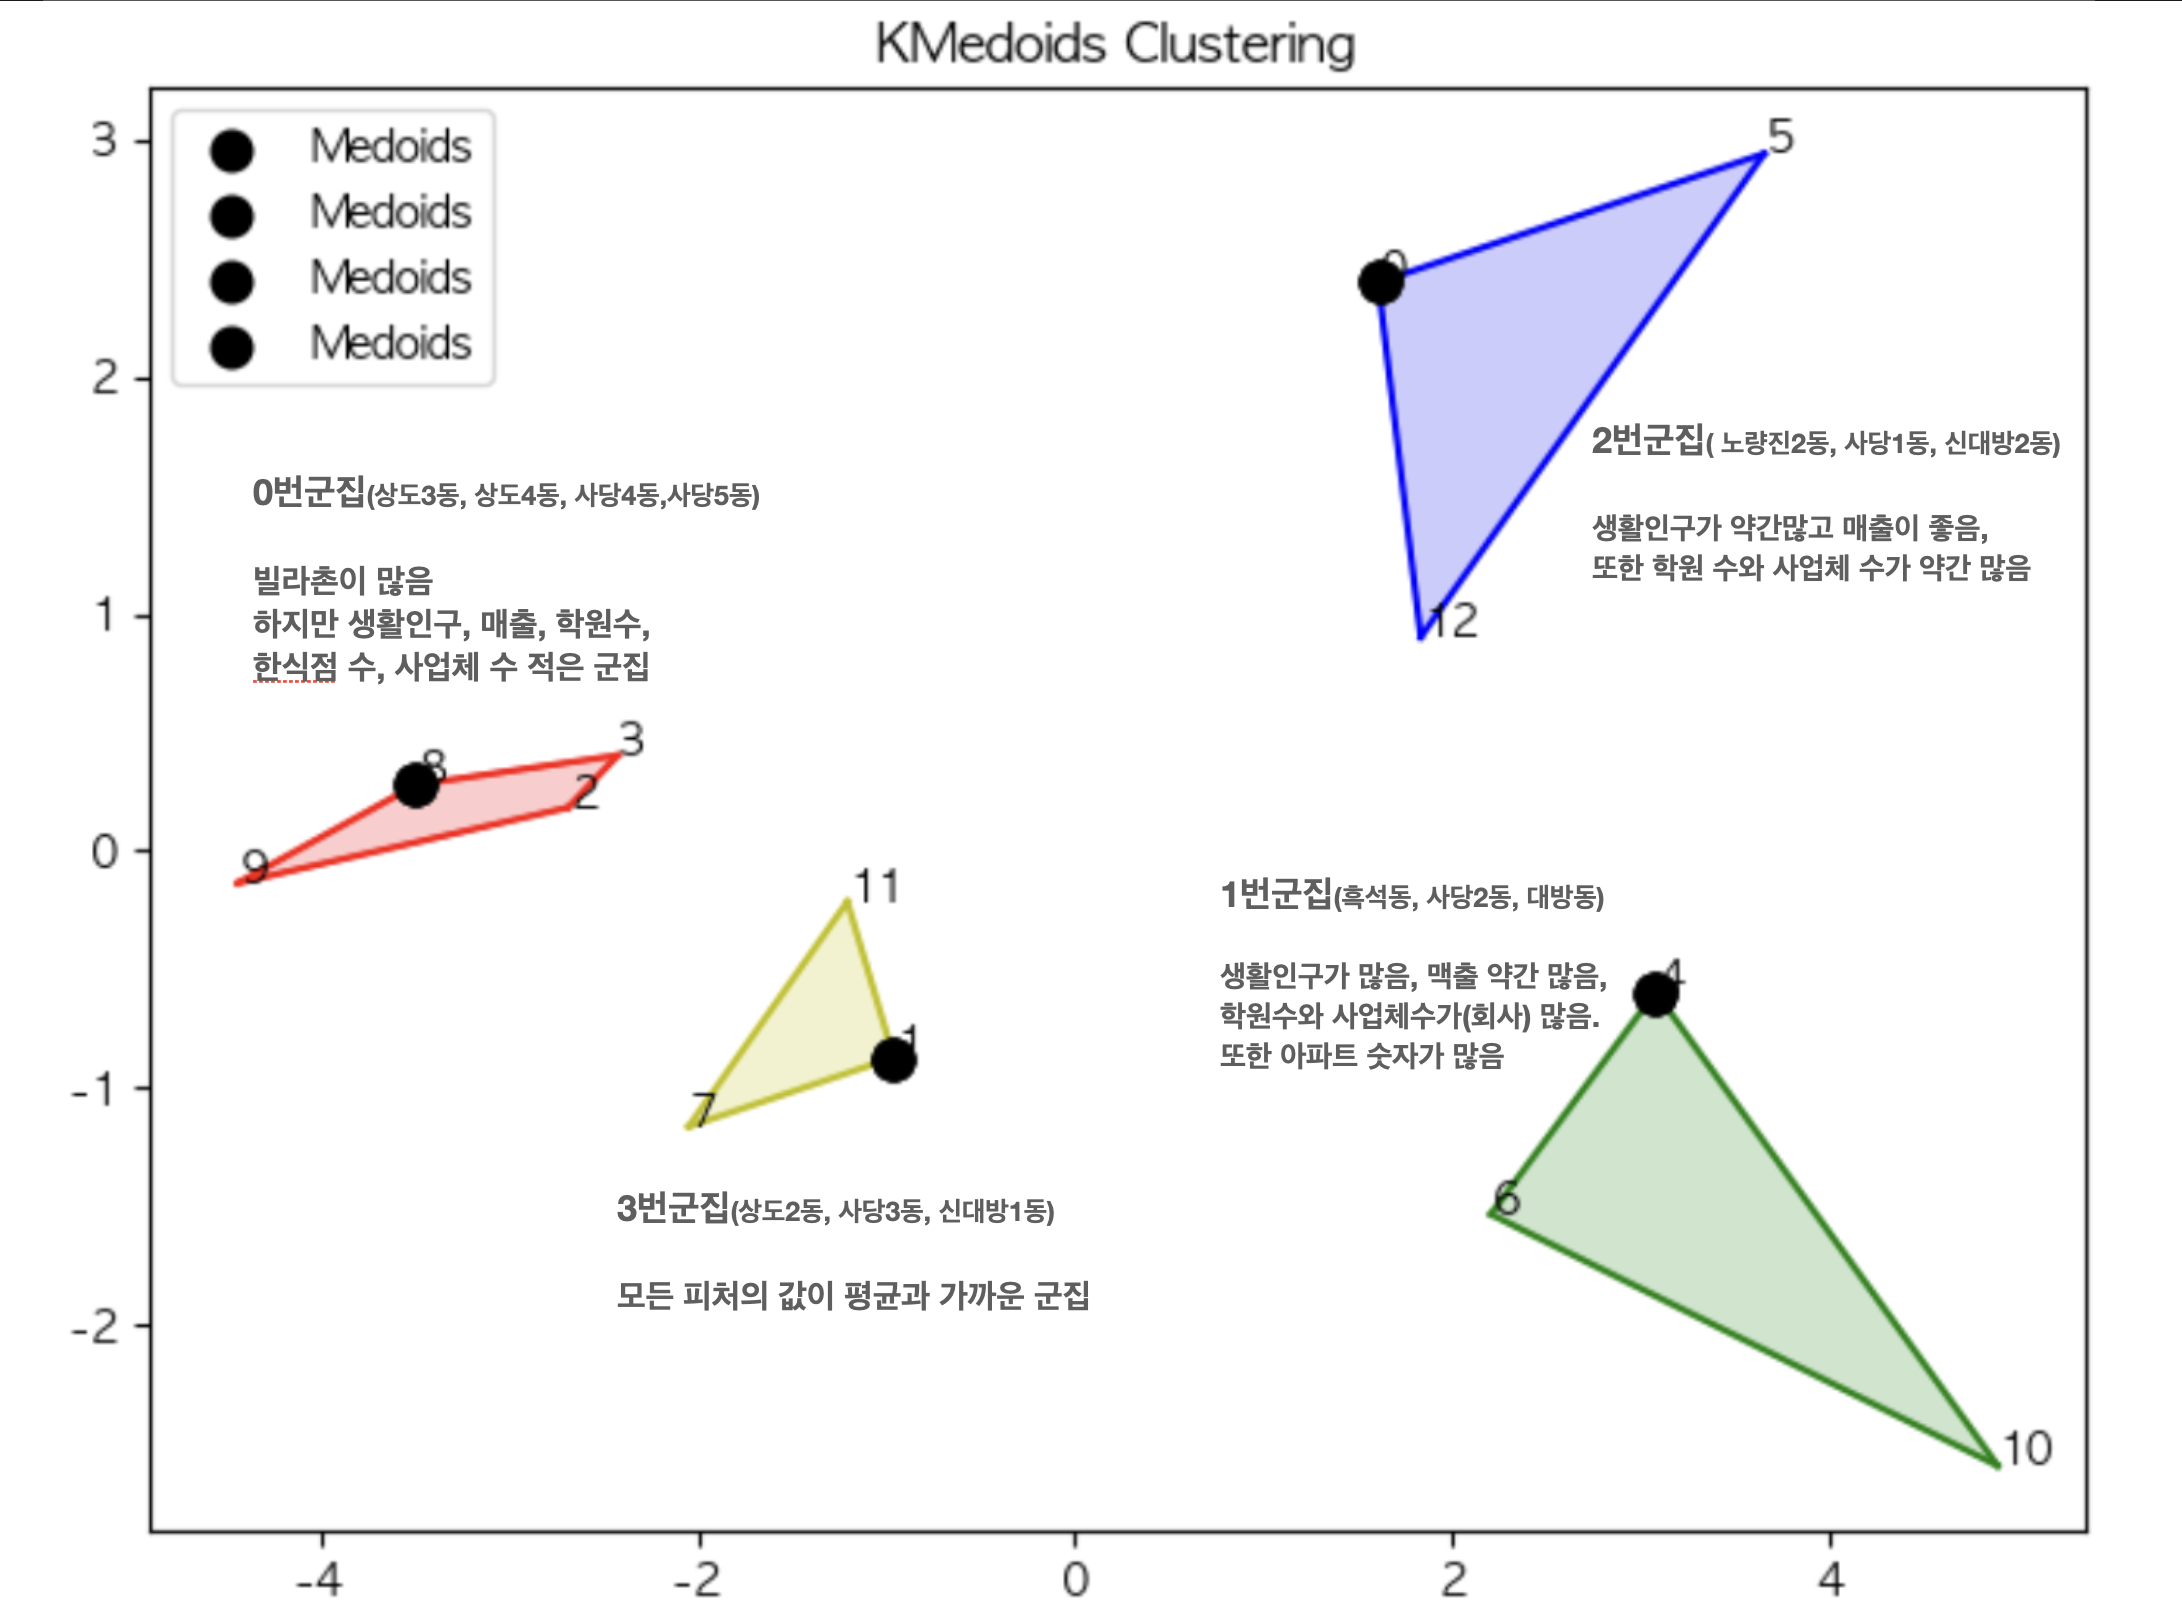

In [57]:
from IPython.display import Image #주피터 노트북에 이미지 삽입

Image('/Users/yeong-gwang/Desktop/스크린샷 2024-02-06 오후 4.04.37.png')